<a href="https://colab.research.google.com/github/Milani0528/webApp_Loan/blob/main/Computational_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import math
from scipy.stats import skew
from matplotlib.patches import Patch
import matplotlib.patches as mpatche
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [ ]:
%matplotlib inline

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Milani vichara/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Milani vichara/test.csv')

In [ ]:
train.describe()

id     CLIENTNUM  Customer_Age  Dependent_count  \
count   7088.000000  7.088000e+03   7088.000000      7088.000000   
mean    5064.406038  7.388666e+08     46.376270         2.342551   
std     2925.352958  3.687971e+07      8.012755         1.296482   
min        1.000000  7.080821e+08     26.000000         0.000000   
25%     2521.750000  7.129505e+08     41.000000         1.000000   
50%     5064.500000  7.177587e+08     46.000000         2.000000   
75%     7589.250000  7.727231e+08     52.000000         3.000000   
max    10126.000000  8.283431e+08     73.000000         5.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     7088.000000               7088.000000             7088.000000   
mean        35.997319                  3.804881                2.341422   
std          7.975578                  1.559558                1.005682   
min         13.000000                  1.000000                0.000000   
25%         32.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            7088.000000   7088.000000          7088.000000   
mean                2.456264   8631.007520          1164.441168   
std                 1.105322   9101.599023           813.066303   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2563.000000           400.000000   
50%                 2.000000   4515.000000          1283.000000   
75%                 3.000000  11107.500000          1782.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      7088.000000           7088.000000      7088.000000     7088.000000   
mean       7466.566352              0.757967      4397.046275       64.850734   
std        9107.792573              0.215893      3391.900863       23.628403   
min          10.000000              0.010000       530.000000       10.000000   
25%        1325.750000              0.629000      2146.750000       45.000000   
50%        3437.000000              0.735000      3906.000000       67.000000   
75%        9836.250000              0.859000      4750.000000       81.000000   
max       34516.000000              3.397000     17995.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  loan_defaulted  
count          7088.000000            7088.000000     7088.000000  
mean              0.711941               0.275698        0.160694  
std               0.236599               0.276144        0.367274  
min               0.000000               0.000000        0.000000  
25%               0.581000               0.024000        0.000000  
50%               0.703000               0.176000        0.000000  
75%               0.818000               0.504000        0.000000  
max               3.571000               0.995000        1.000000

In [ ]:
train.head()

id  CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0  8949  708472008            44      F                3      Uneducated   
1  6666  713927283            39      F                1        Graduate   
2  7120  715593783            52      M                1         Unknown   
3  2258  713237958            34      M                0        Graduate   
4  3462  717569283            47      M                5       Doctorate   

  Marital_Status Income_Category Card_Category  Months_on_book  ...  \
0        Married  Less than $40K          Blue              36  ...   
1         Single         Unknown          Blue              34  ...   
2        Married    $80K - $120K          Blue              36  ...   
3        Married     $40K - $60K          Blue              17  ...   
4         Single  Less than $40K          Blue              36  ...   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3        6680.0                 1839           4841.0   
1                      1        2884.0                 2517            367.0   
2                      2       14858.0                 1594          13264.0   
3                      4        2638.0                 2092            546.0   
4                      2        8896.0                 1338           7558.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 0.617             7632              95                0.532   
1                 0.693             4809              87                0.740   
2                 0.510             4286              72                0.636   
3                 0.591             1868              43                0.344   
4                 0.741             4252              70                0.591   

   Avg_Utilization_Ratio  loan_defaulted  
0                  0.275               0  
1                  0.873               0  
2                  0.107               0  
3                  0.793               0  
4                  0.150               0  

[5 rows x 22 columns]

In [ ]:
print(train.columns)

Index(['id', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'loan_defaulted'],
      dtype='object')


In [ ]:
print("Dataset Shape:", train.shape)
print("\nData Types:\n", train.dtypes)
print("\nMissing Values:\n", train.isnull().sum())

Dataset Shape: (7088, 22)

Data Types:
 id                            int64
CLIENTNUM                     int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
loan_defaulted                int64
dtype: object

Missing Values:
 id                          0
CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count 

In [ ]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Features:\n")
for feature in numerical_features:
    print(f"- {feature}")

Numerical Features:

- id
- CLIENTNUM
- Customer_Age
- Dependent_count
- Months_on_book
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio
- loan_defaulted


In [ ]:
categorical_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:\n")
for feature in categorical_features:
    print(f"- {feature}")

Categorical Features:

- Gender
- Education_Level
- Marital_Status
- Income_Category
- Card_Category


In [ ]:
num_rows, num_columns = train.shape

print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_columns}")

Total number of rows: 7088
Total number of columns: 22


/tmp/ipython-input-1458821766.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette=custom_colors)


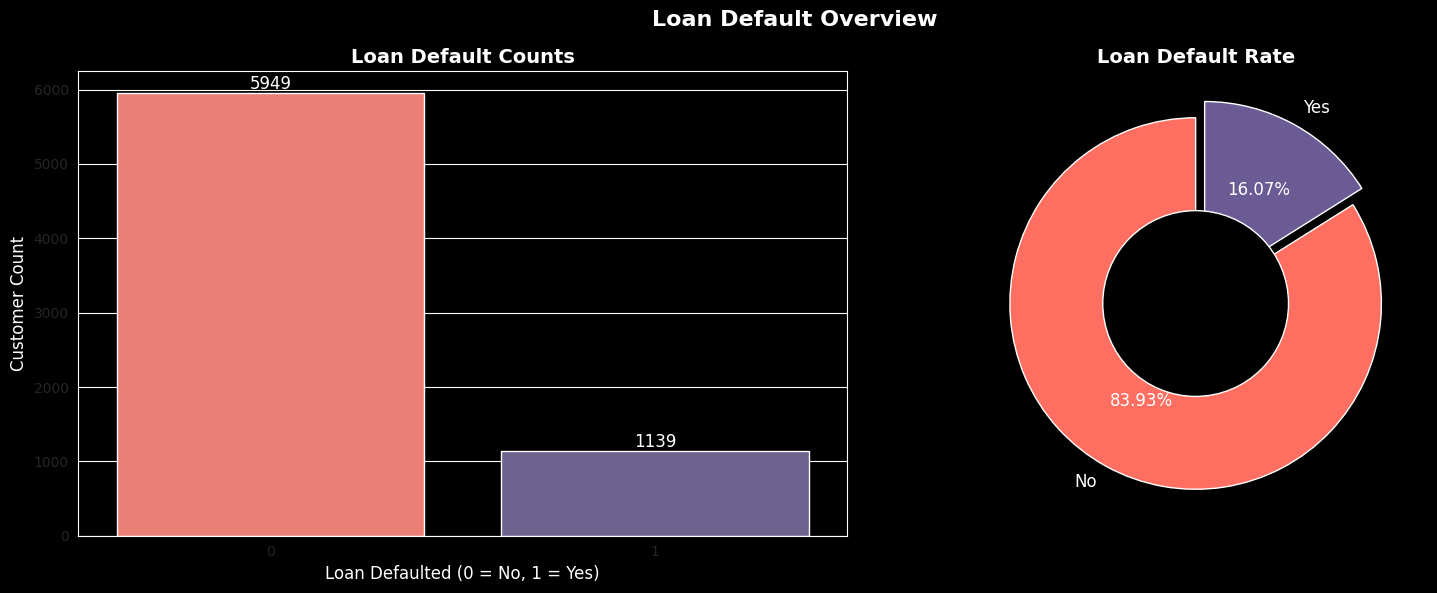

In [ ]:
train.columns = train.columns.str.strip()

# Value counts for the target variable
response_counts = train["loan_defaulted"].value_counts().sort_index()
labels = ["No", "Yes"]  # 0 = No Default, 1 = Default

# 🎨 Custom colors (choose your own)
custom_colors = ["#FF6F61", "#6B5B95"]  # Coral + Purple

# Global black background style
plt.style.use("dark_background")
sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Set up the layout
plt.figure(figsize=(16, 6), facecolor="black")
plt.suptitle("Loan Default Overview", fontsize=16, fontweight='bold', color="white")

# --- Bar Chart ---
plt.subplot(1, 2, 1, facecolor="black")
sns.barplot(x=response_counts.index, y=response_counts.values, palette=custom_colors)
plt.title("Loan Default Counts", fontsize=14, fontweight="bold", color="white")
plt.xlabel("Loan Defaulted (0 = No, 1 = Yes)", fontsize=12, color="white")
plt.ylabel("Customer Count", fontsize=12, color="white")
for i, v in enumerate(response_counts.values):
    plt.text(i, v + max(response_counts.values) * 0.01, f"{v}", ha="center", fontsize=12, color="white")

# --- Donut Pie Chart ---
plt.subplot(1, 2, 2, facecolor="black")
wedges, texts, autotexts = plt.pie(
    response_counts,
    labels=labels,
    autopct="%.2f%%",
    startangle=90,
    colors=custom_colors,
    explode=[0, 0.1],
    textprops={"fontsize": 12, "color": "white"}
)

# Donut hole (black center)
centre_circle = plt.Circle((0, 0), 0.5, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Loan Default Rate", fontsize=14, fontweight="bold", color="white")
plt.tight_layout()
plt.show()

/tmp/ipython-input-590689206.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
/tmp/ipython-input-590689206.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')


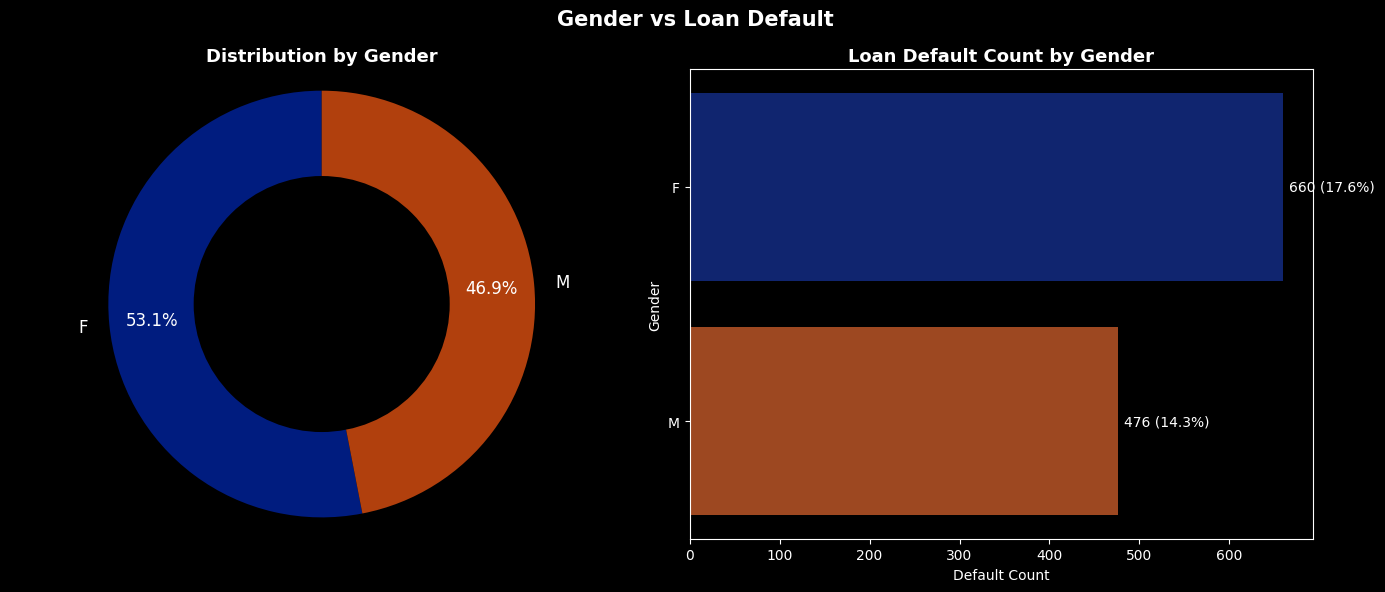

/tmp/ipython-input-590689206.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
/tmp/ipython-input-590689206.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')


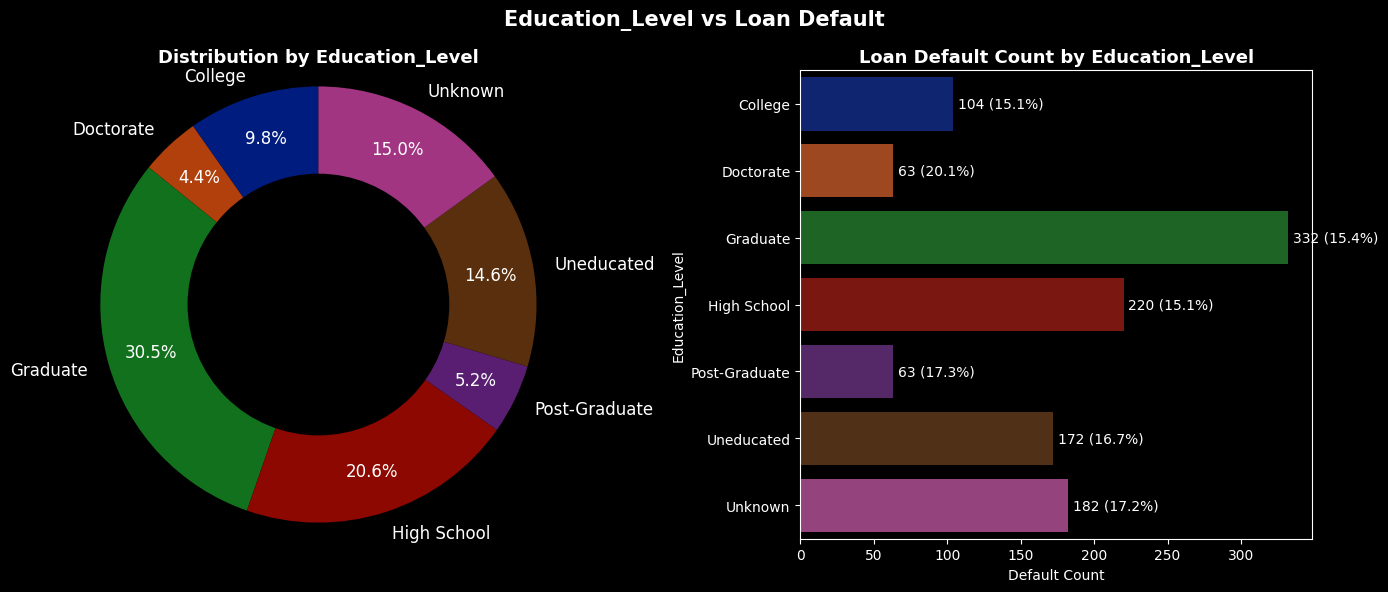

/tmp/ipython-input-590689206.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
/tmp/ipython-input-590689206.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')


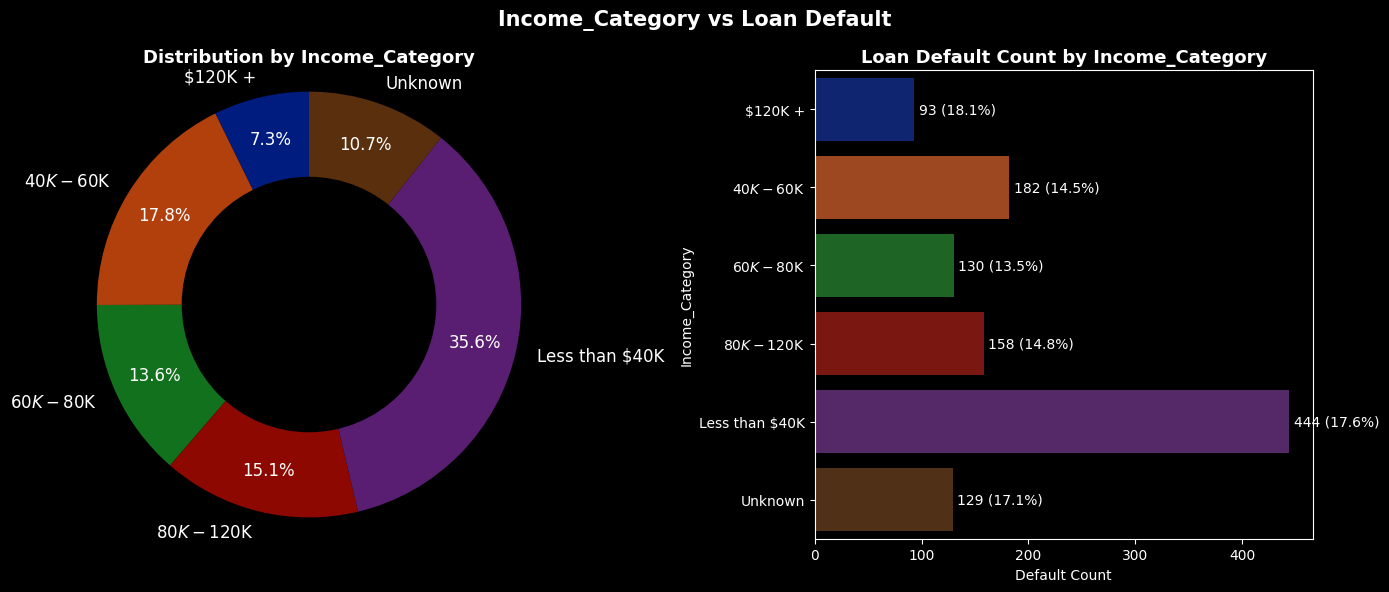

/tmp/ipython-input-590689206.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
/tmp/ipython-input-590689206.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')


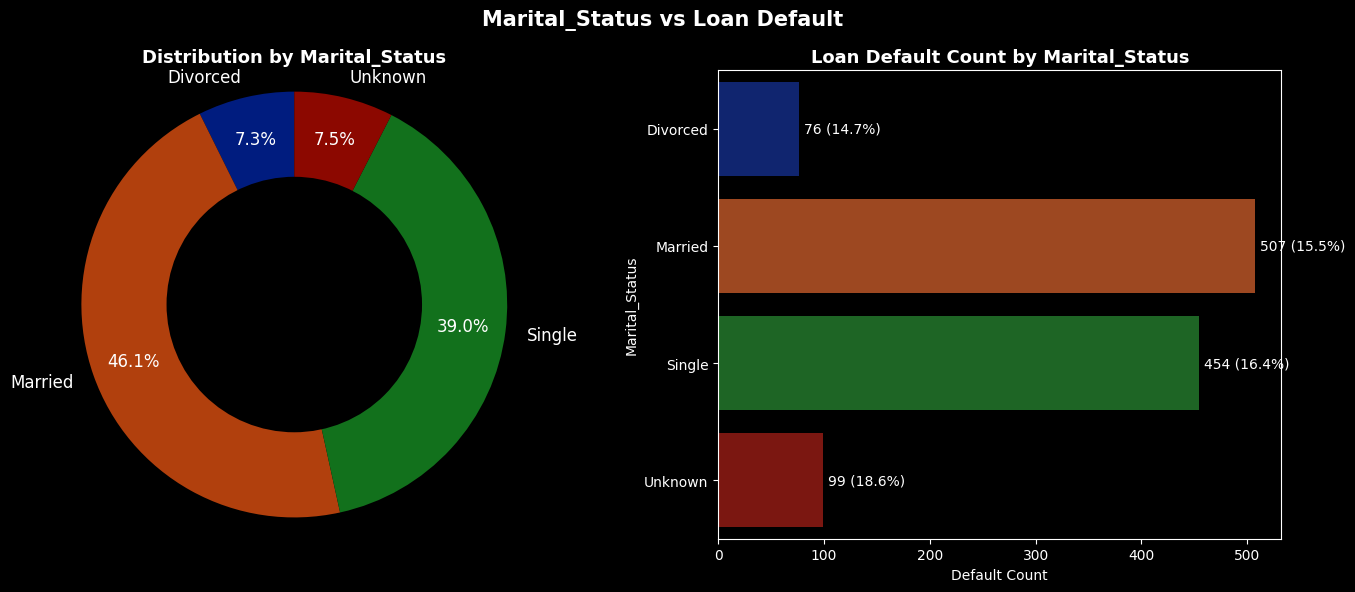

/tmp/ipython-input-590689206.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
/tmp/ipython-input-590689206.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')


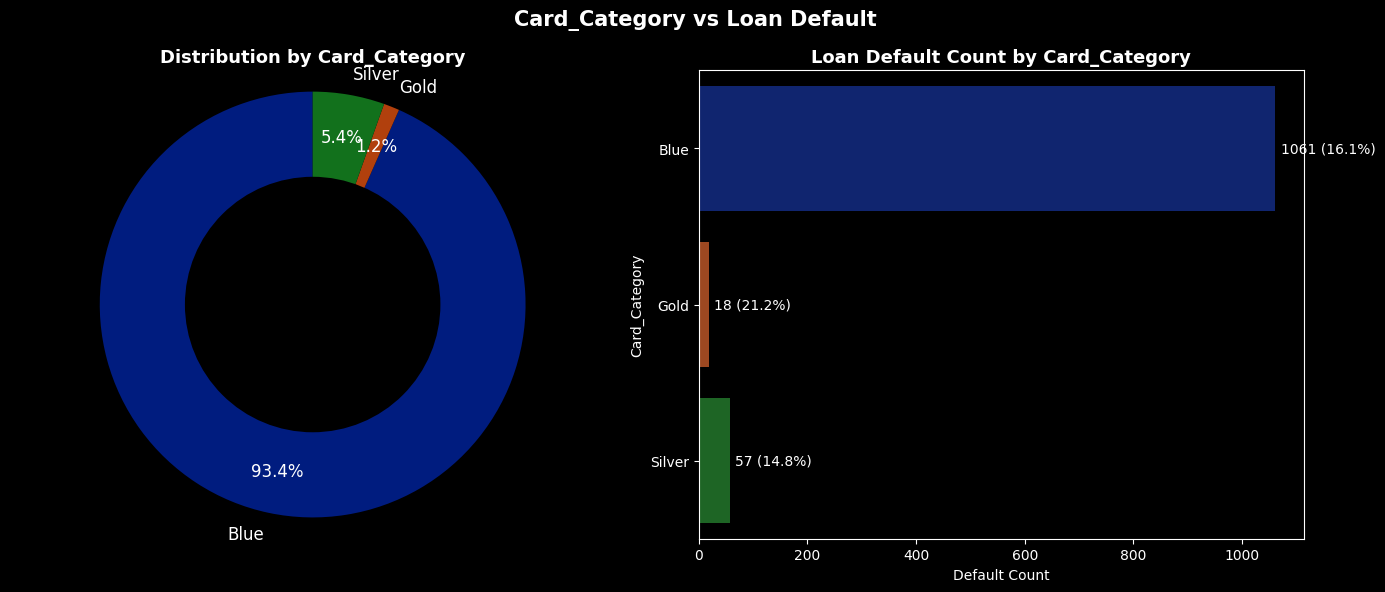

In [ ]:
def pie_bar_plot(df, col, response_col='loan_defaulted', palette_name='pastel'):
    # Clean data
    df = df.copy()
    df.columns = df.columns.str.strip()

    # Get counts
    total_counts = df[col].value_counts().sort_index()
    positive_counts = df[df[response_col] == 1][col].value_counts().sort_index()
    percentages = (positive_counts / total_counts * 100).fillna(0)


    # Set black theme
    plt.style.use('dark_background')
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
    fig.suptitle(f"{col} vs Loan Default", fontsize=15, fontweight='bold', color='white')

    # Color palette
    colors = sns.color_palette(palette_name, len(total_counts))

    # ------- Donut Chart with External Labels -------
    wedges, texts, autotexts = axes[0].pie(
        total_counts.values,
        labels=total_counts.index,  # Show category names directly on the chart
        autopct='%.1f%%',
        pctdistance=0.8,
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.5),
        textprops={"fontsize": 12, "color": "white"}
    )
    center_circle = plt.Circle((0, 0), 0.6, fc='black')
    axes[0].add_artist(center_circle)
    axes[0].set_title(f"Distribution by {col}", fontsize=13, fontweight='bold', color='white')
    axes[0].axis('equal')  # Keeps the pie chart circular
    # Remove the legend to match 2nd image
    axes[0].legend().remove()

    # ------- Horizontal Bar Chart -------
    sns.barplot(y=positive_counts.index, x=positive_counts.values, palette=colors, ax=axes[1])
    axes[1].set_title(f"Loan Default Count by {col}", fontsize=13, fontweight='bold', color='white')
    axes[1].set_xlabel("Default Count", color='white')
    axes[1].set_ylabel(col, color='white')
    axes[1].tick_params(colors='white')
    axes[1].set_facecolor('black')
    for spine in axes[1].spines.values():
        spine.set_edgecolor('white')

    # Annotate bar chart
    for idx, val in enumerate(positive_counts):
        axes[1].text(val + max(positive_counts.values) * 0.01, idx,
                     f"{val} ({percentages[idx]:.1f}%)", va='center', fontsize=10, color='white')

    plt.tight_layout()
    plt.show()

    # ✅ Example Usage with your DataFrame (train_test_split):
train.columns = train.columns.str.strip()  # strip column names just in case

train = train[train['Card_Category'] != 'Platinum']

# Call the function for a few features
pie_bar_plot(train, 'Gender' , palette_name='dark')
pie_bar_plot(train, 'Education_Level', palette_name='dark')
pie_bar_plot(train, 'Income_Category',palette_name='dark')
pie_bar_plot(train, 'Marital_Status',palette_name='dark')
pie_bar_plot(train, 'Card_Category',palette_name='dark')

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


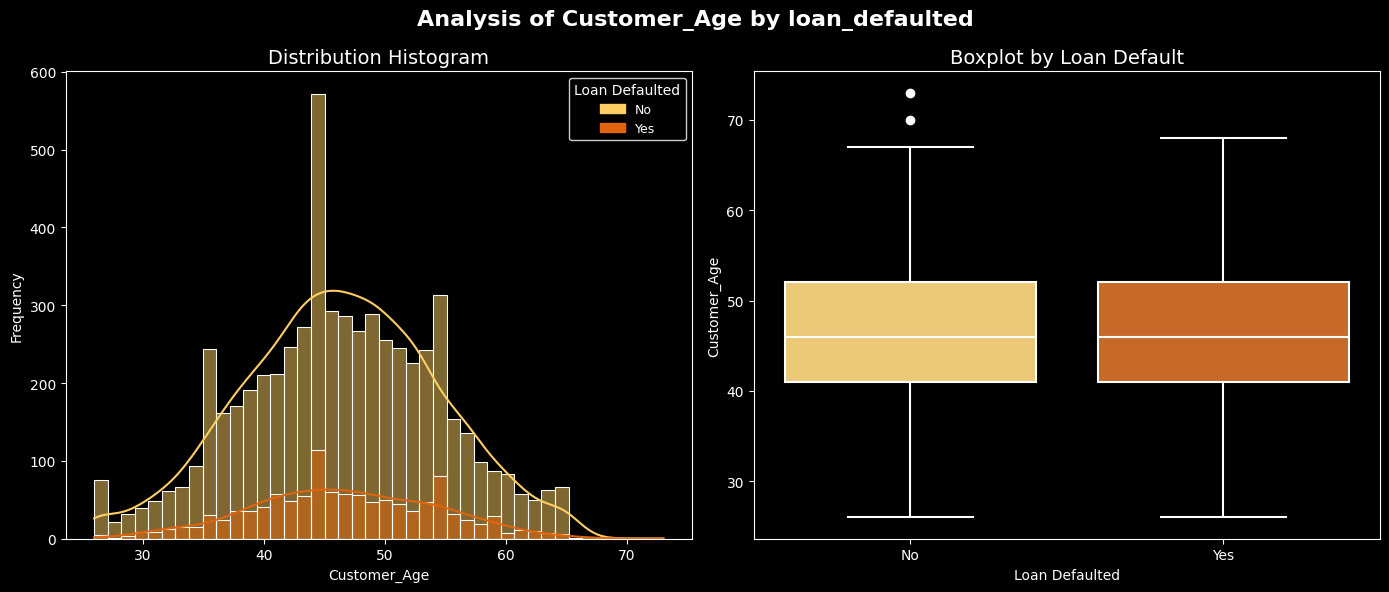

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


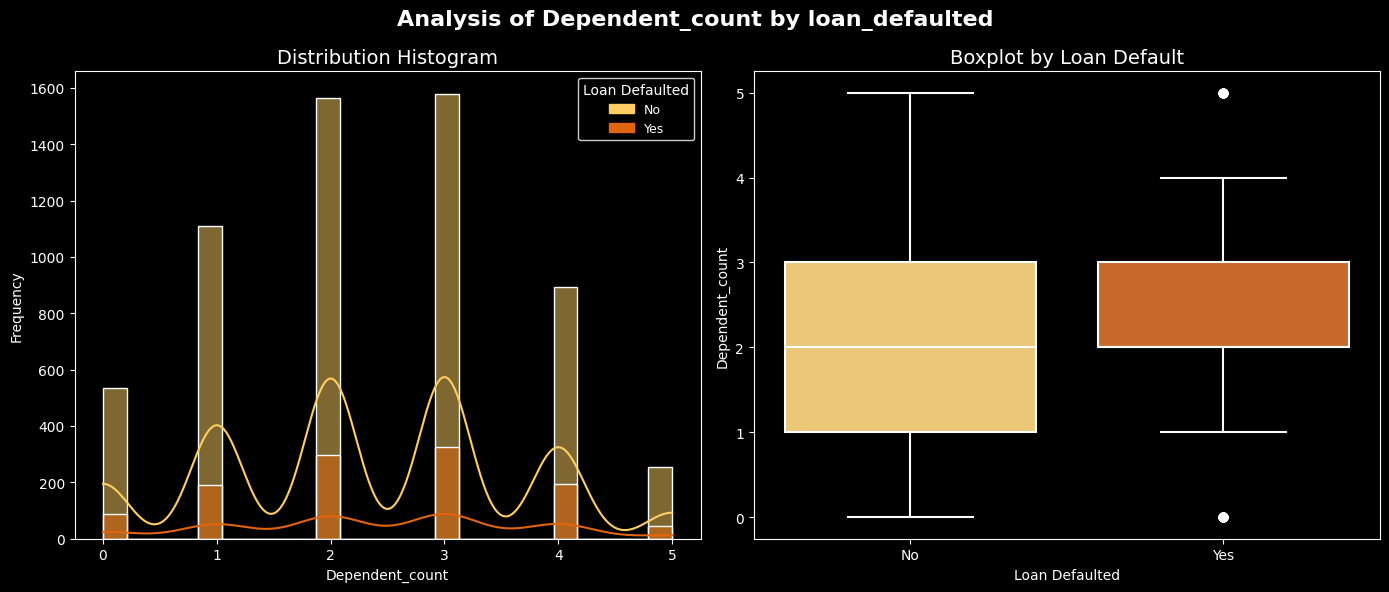

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


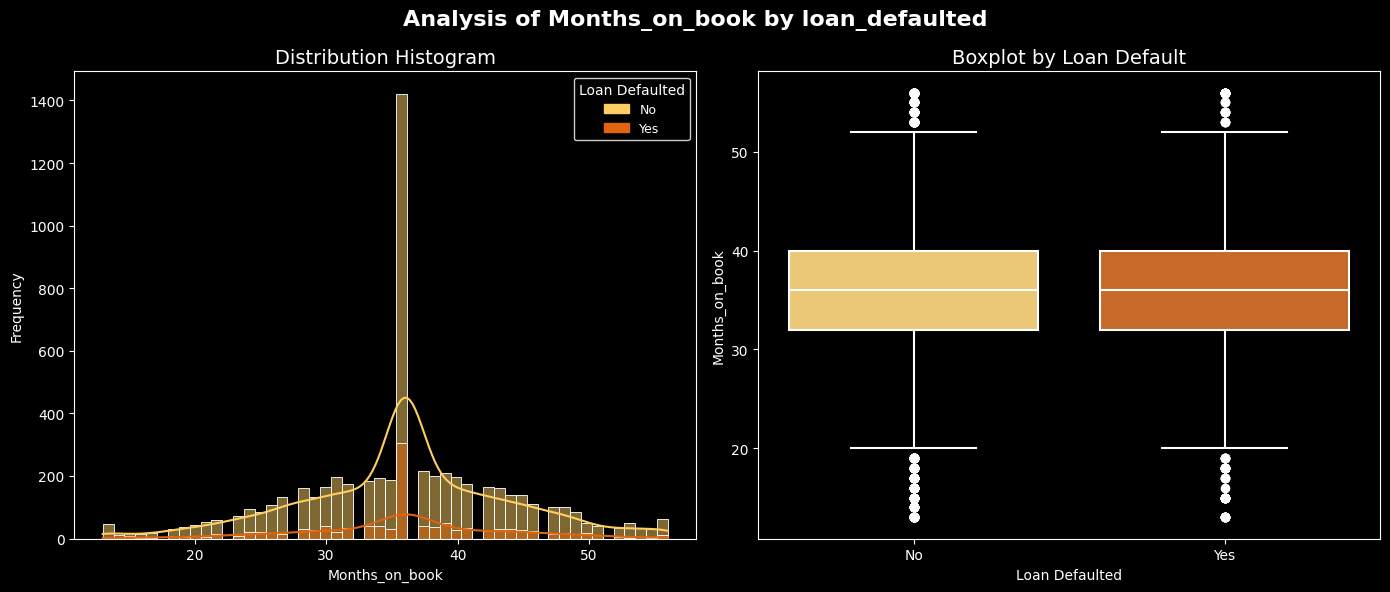

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


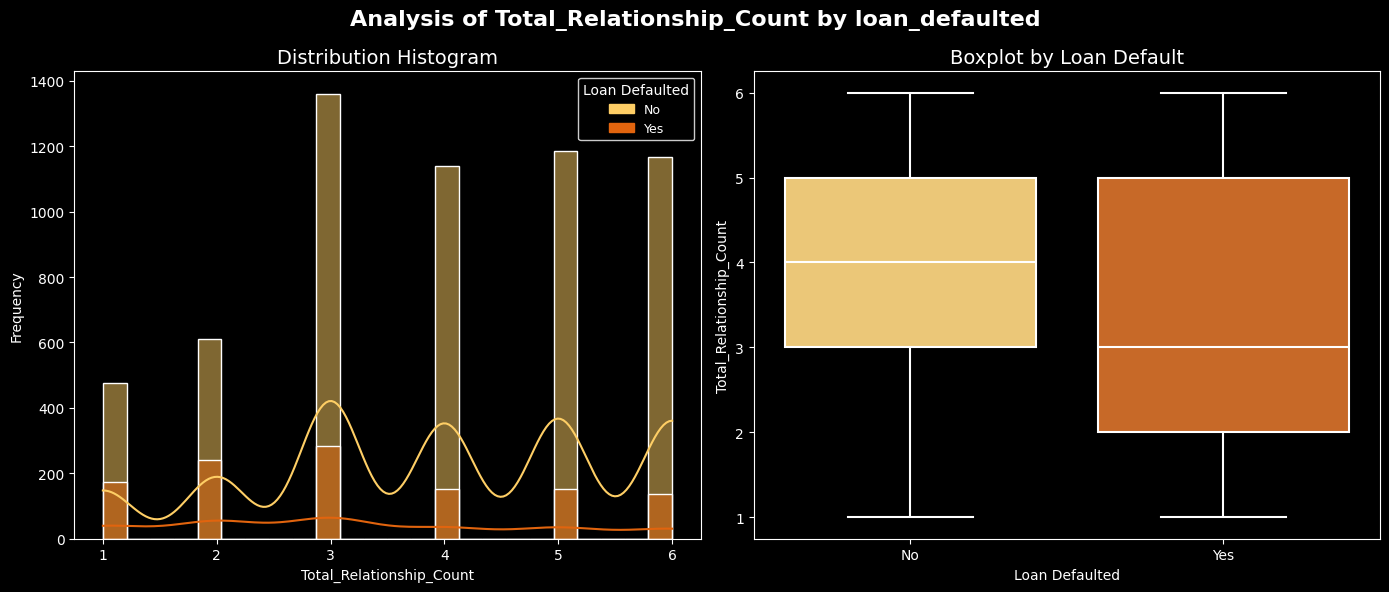

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


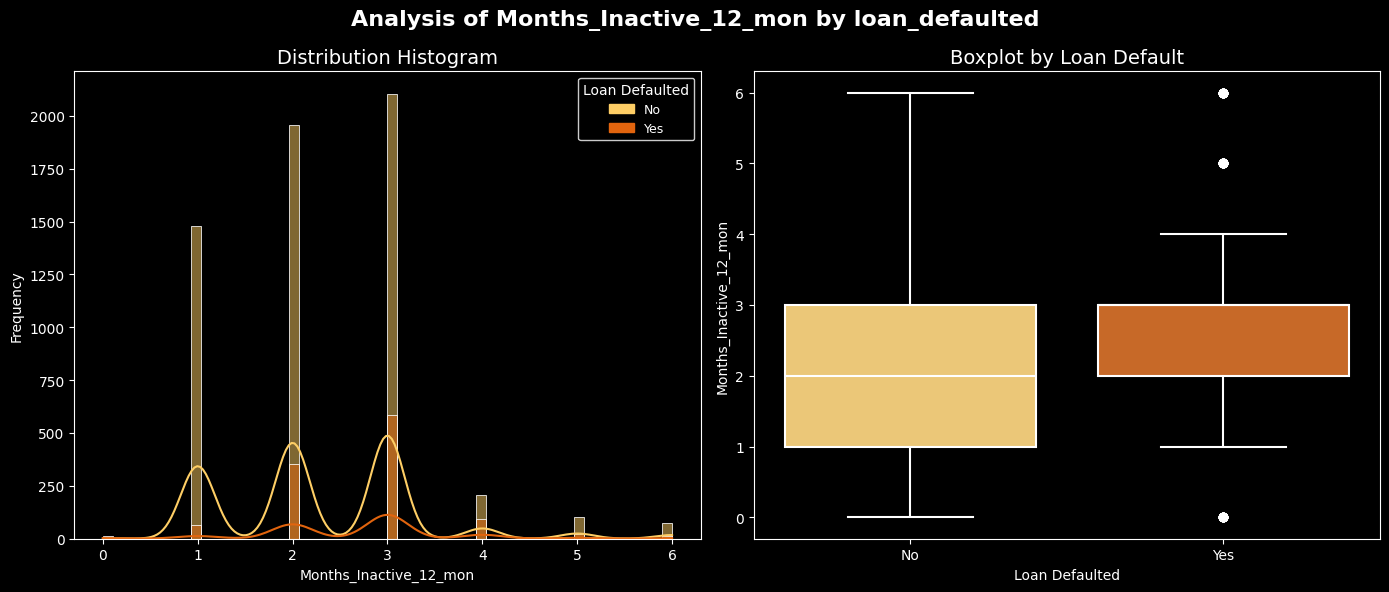

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


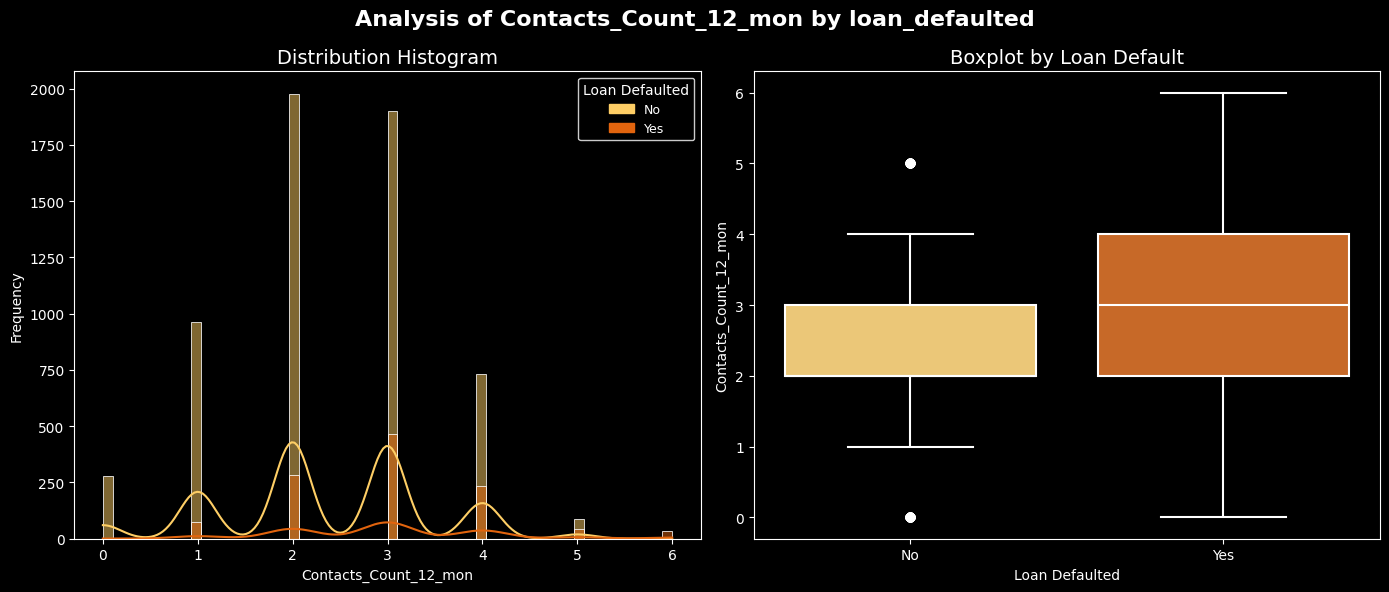

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


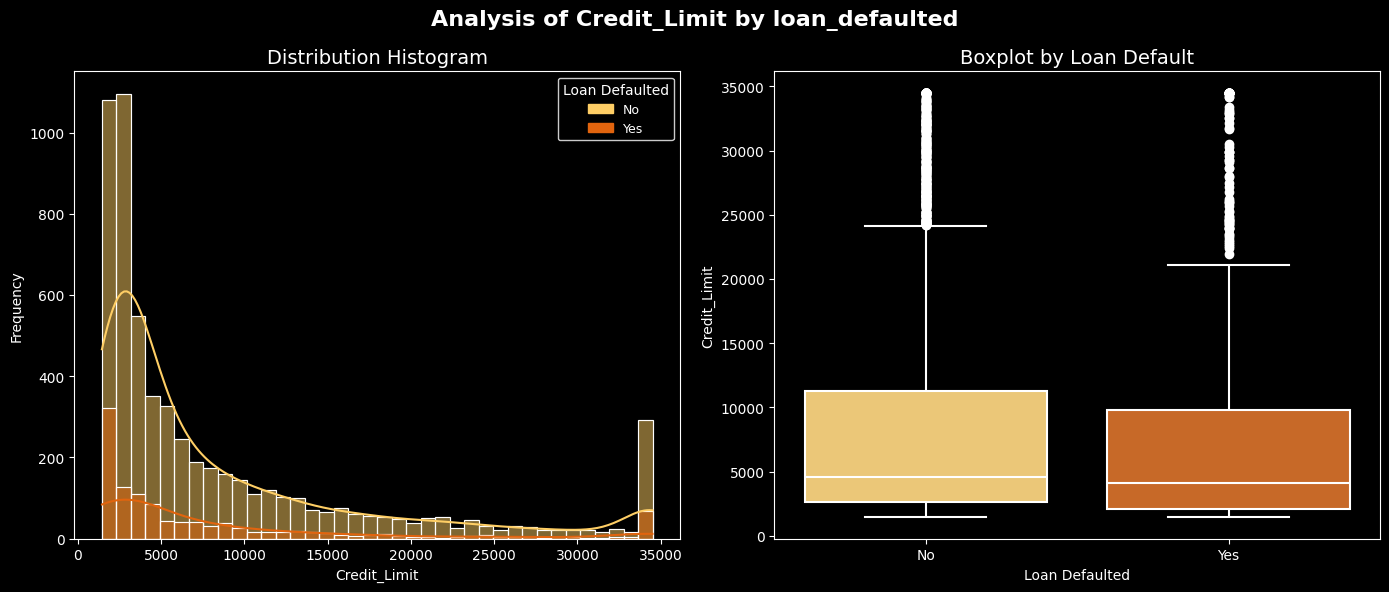

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


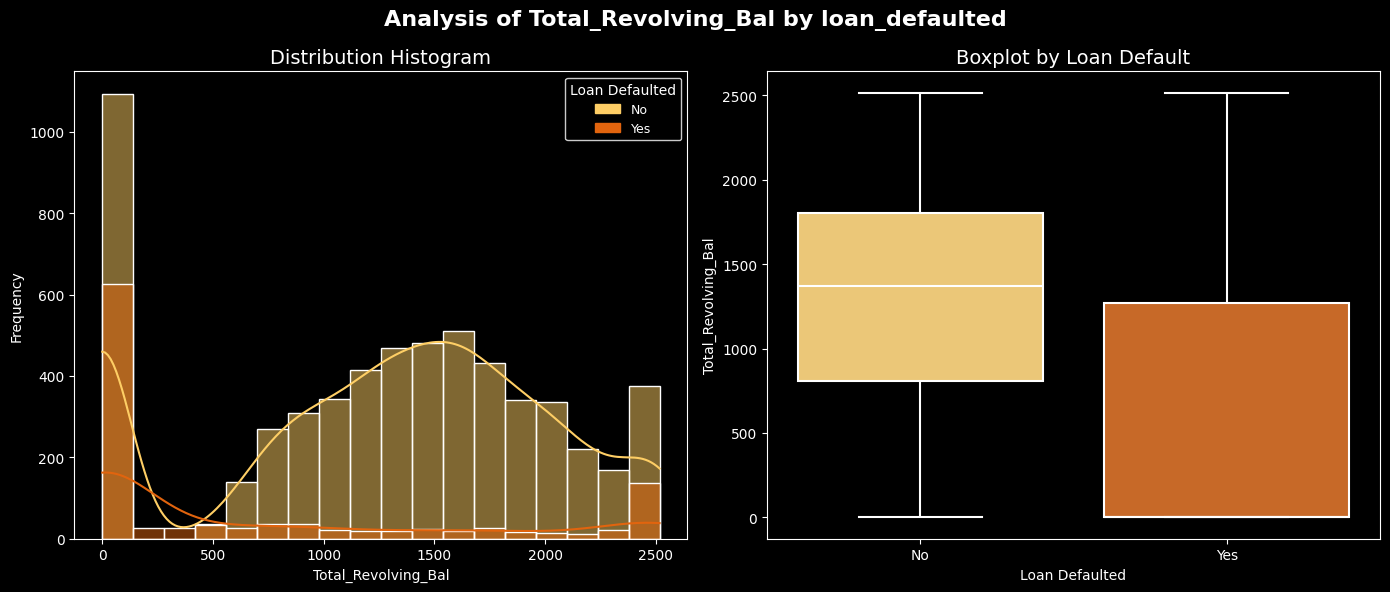

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


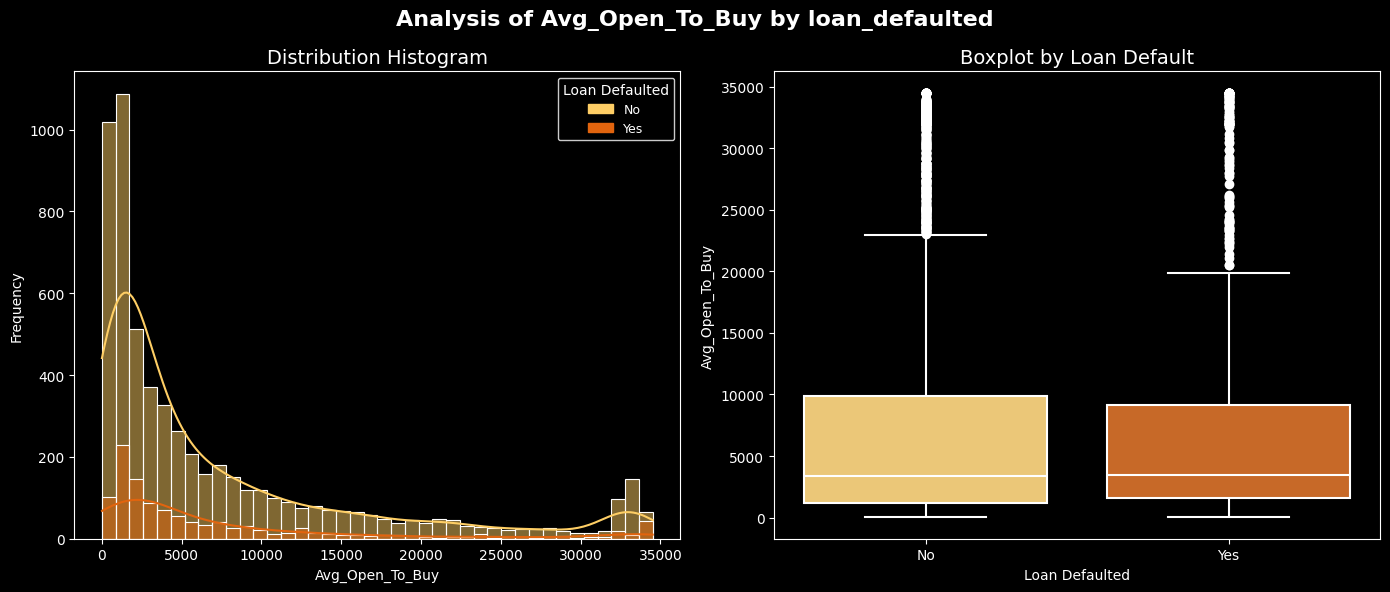

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


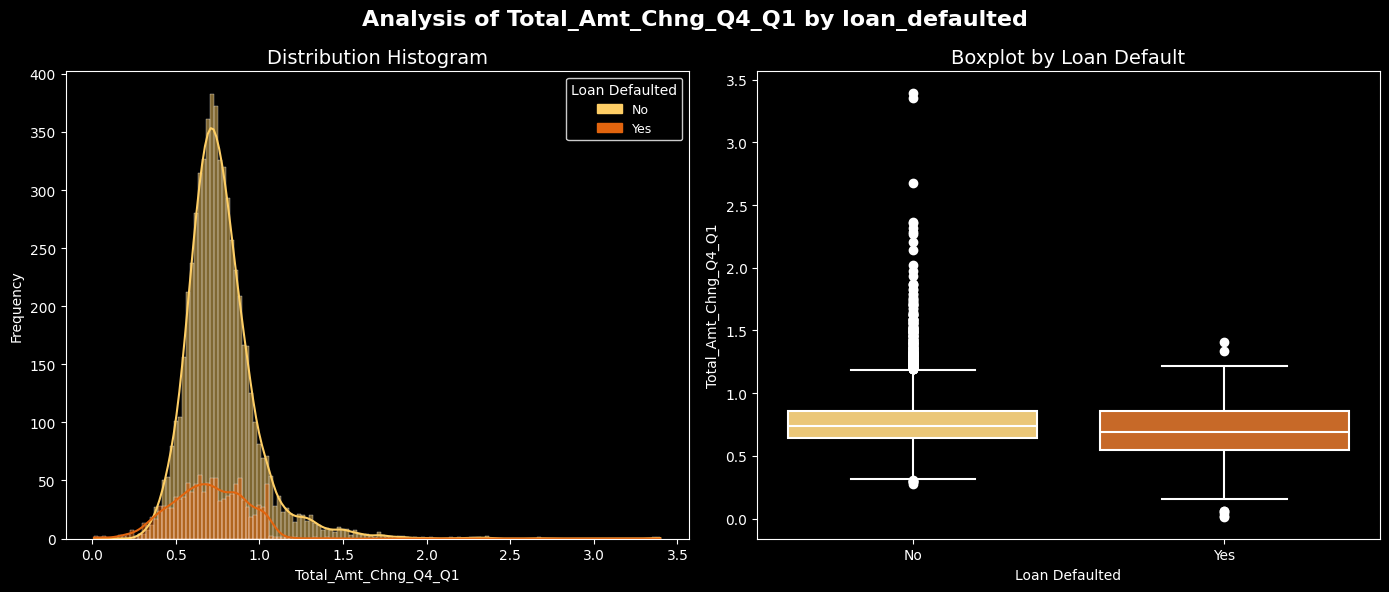

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


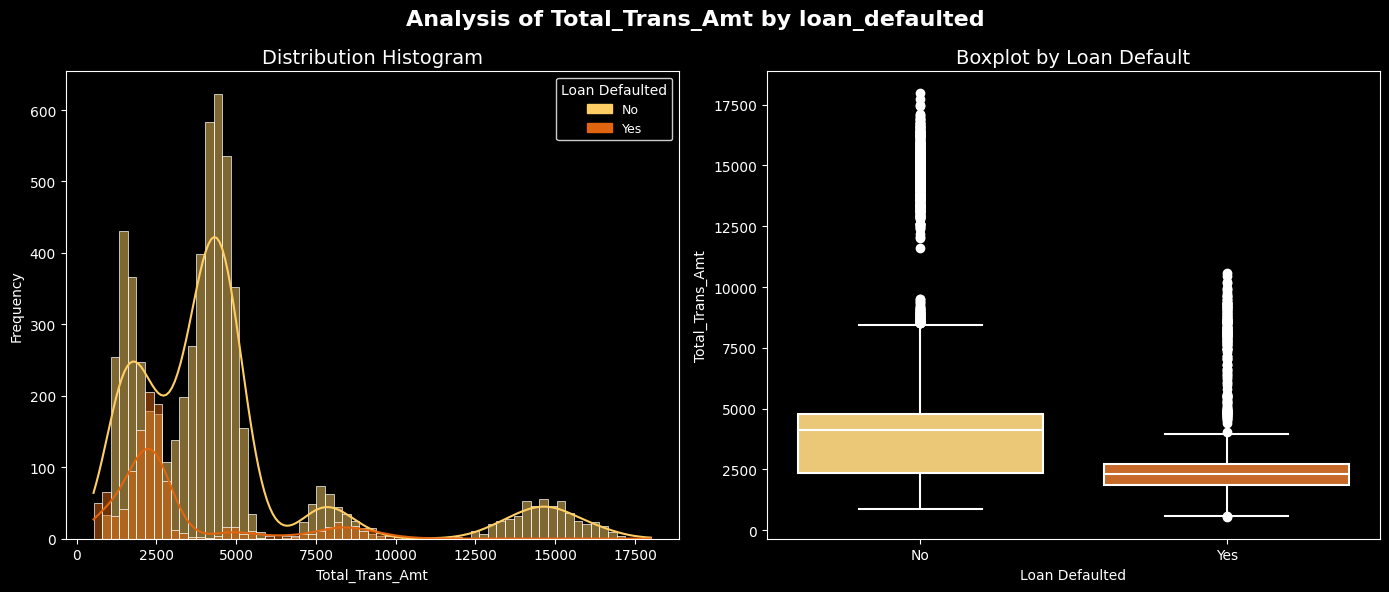

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


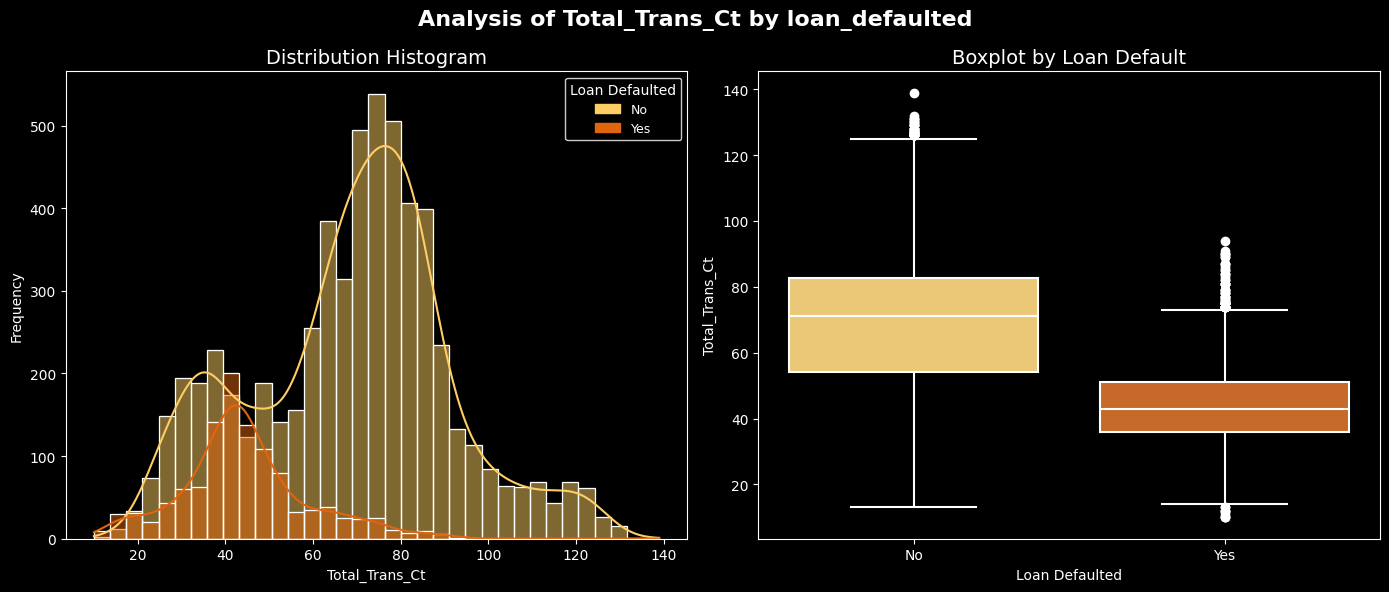

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


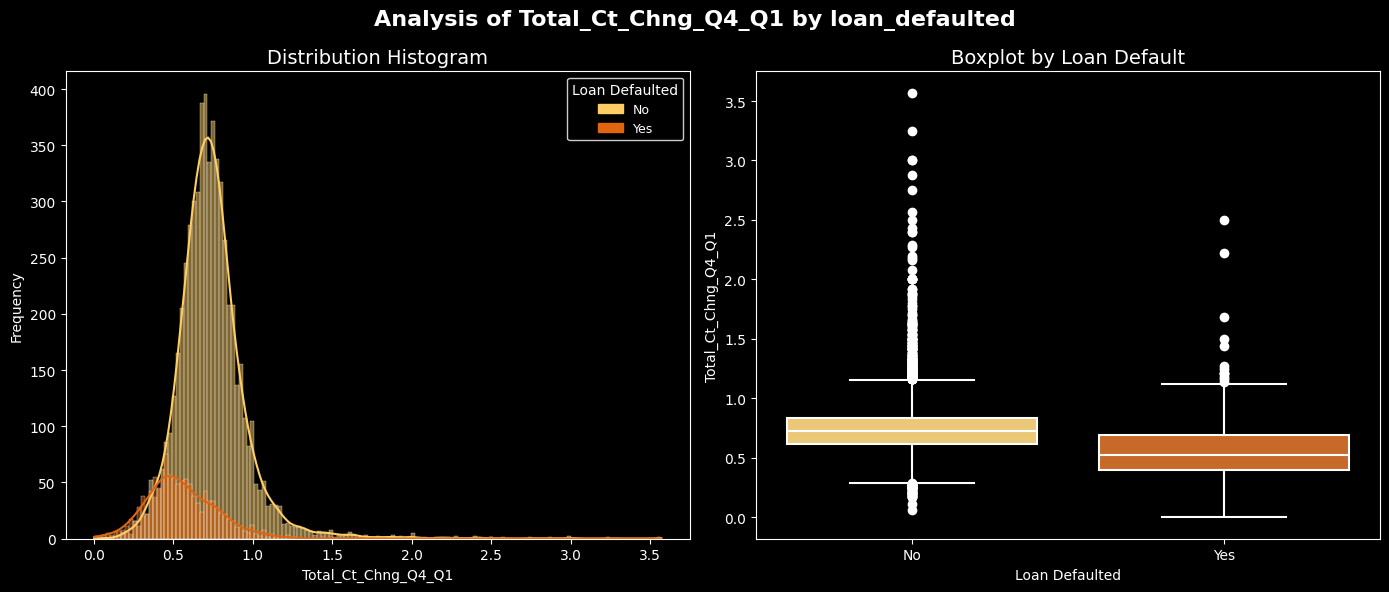

/tmp/ipython-input-2567344226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


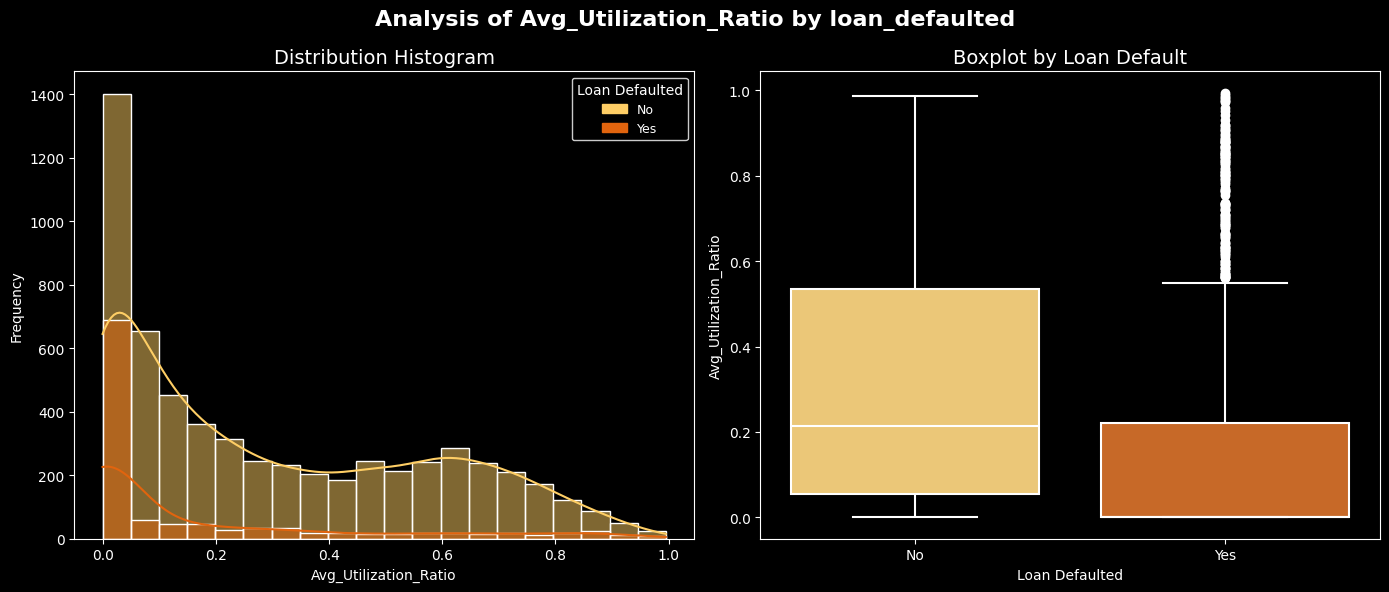

In [ ]:
def hist_with_hue(df, column, target='loan_defaulted', palette_name='Set2'):
    df = df.copy()
    df['loan_default'] = np.where(df[target] == 1, 'Yes', 'No')  # ✅ renamed column

    plt.style.use('dark_background')
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
    fig.suptitle(f"Analysis of {column} by {target}", fontsize=16, fontweight='bold', color='white')

    palette = sns.color_palette(palette_name, n_colors=2)
    palette_dict = {'No': palette[0], 'Yes': palette[1]}
    # ✅ Histogram
    sns.histplot(
        data=df,
        x=column,
        hue='loan_default',
        kde=True,
        palette=palette_dict,
        hue_order=['Yes', 'No'],
        ax=axes[0]
    )
    axes[0].set_title("Distribution Histogram", fontsize=14, color='white')
    axes[0].set_xlabel(column, color='white')
    axes[0].set_ylabel("Frequency", color='white')
    axes[0].tick_params(colors='white')
    for spine in axes[0].spines.values():
        spine.set_edgecolor('white')

    # ✅ Custom legend
    handles = [
        mpatches.Patch(color=palette_dict['No'], label='No'),
        mpatches.Patch(color=palette_dict['Yes'], label='Yes')
    ]
    axes[0].legend(handles=handles, title='Loan Defaulted', facecolor='black', edgecolor='white', labelcolor='white',
                   title_fontsize=10, fontsize=9 , loc='best')

    # ✅ Boxplot
    sns.boxplot(
        data=df,
        x='loan_default',
        y=column,
        palette=palette_dict,
        ax=axes[1],
        linewidth=1.5,
        boxprops=dict(edgecolor='white'),
        whiskerprops=dict(color='white'),
        capprops=dict(color='white'),
        medianprops=dict(color='white'),
        flierprops=dict(markerfacecolor='white', markeredgecolor='white')
    )
    axes[1].set_title("Boxplot by Loan Default", fontsize=14, color='white')
    axes[1].set_xlabel("Loan Defaulted", color='white')
    axes[1].set_ylabel(column, color='white')
    axes[1].tick_params(colors='white')
    for spine in axes[1].spines.values():
        spine.set_edgecolor('white')

    plt.tight_layout()
    plt.show()

hist_with_hue(train, 'Customer_Age', palette_name='YlOrBr')
hist_with_hue(train, 'Dependent_count', palette_name='YlOrBr')
hist_with_hue(train, 'Months_on_book', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Relationship_Count', palette_name='YlOrBr')
hist_with_hue(train, 'Months_Inactive_12_mon', palette_name='YlOrBr')
hist_with_hue(train, 'Contacts_Count_12_mon', palette_name='YlOrBr')
hist_with_hue(train, 'Credit_Limit', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Revolving_Bal', palette_name='YlOrBr')
hist_with_hue(train, 'Avg_Open_To_Buy', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Amt_Chng_Q4_Q1', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Trans_Amt', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Trans_Ct', palette_name='YlOrBr')
hist_with_hue(train, 'Total_Ct_Chng_Q4_Q1', palette_name='YlOrBr')
hist_with_hue(train, 'Avg_Utilization_Ratio', palette_name='YlOrBr')


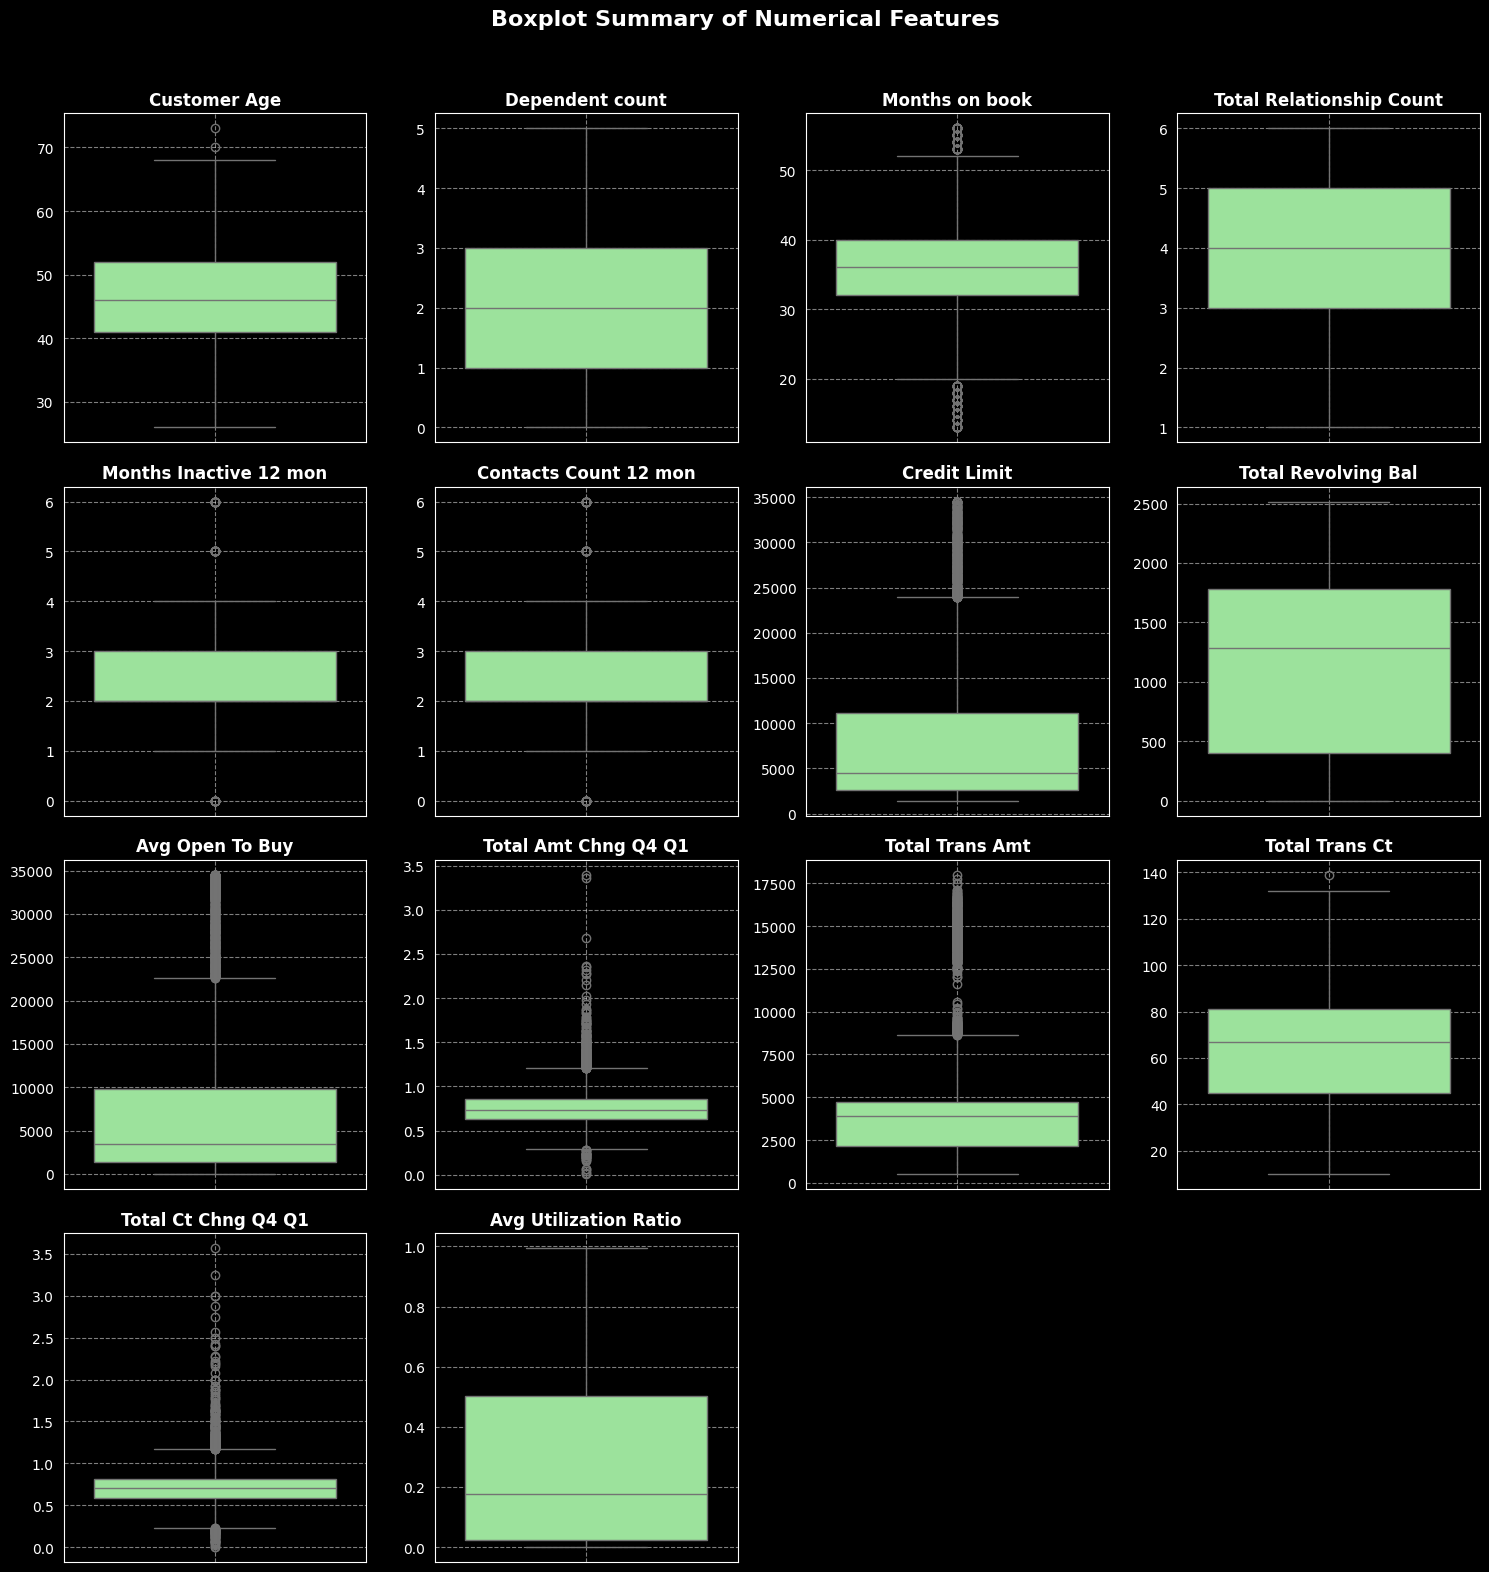

In [ ]:
df = train.copy()
df.columns = df.columns.str.strip()

# Select numerical features (excluding IDs and target)
excluded = ['id', 'CLIENTNUM', 'loan_defaulted']
num_cols = [col for col in df.select_dtypes(include='number').columns if col not in excluded]

# Limit for performance
df = df[num_cols].head(10000)

# Define color palette (adjust if more than 8 features)
colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen',
          'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']

# Create grid
n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot each boxplot with a unique color
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(col.replace("_", " "), fontsize=12, fontweight='bold')
    axes[i].set_ylabel("")  # remove y-axis label
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove extra empty plots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Style
plt.suptitle("Boxplot Summary of Numerical Features", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

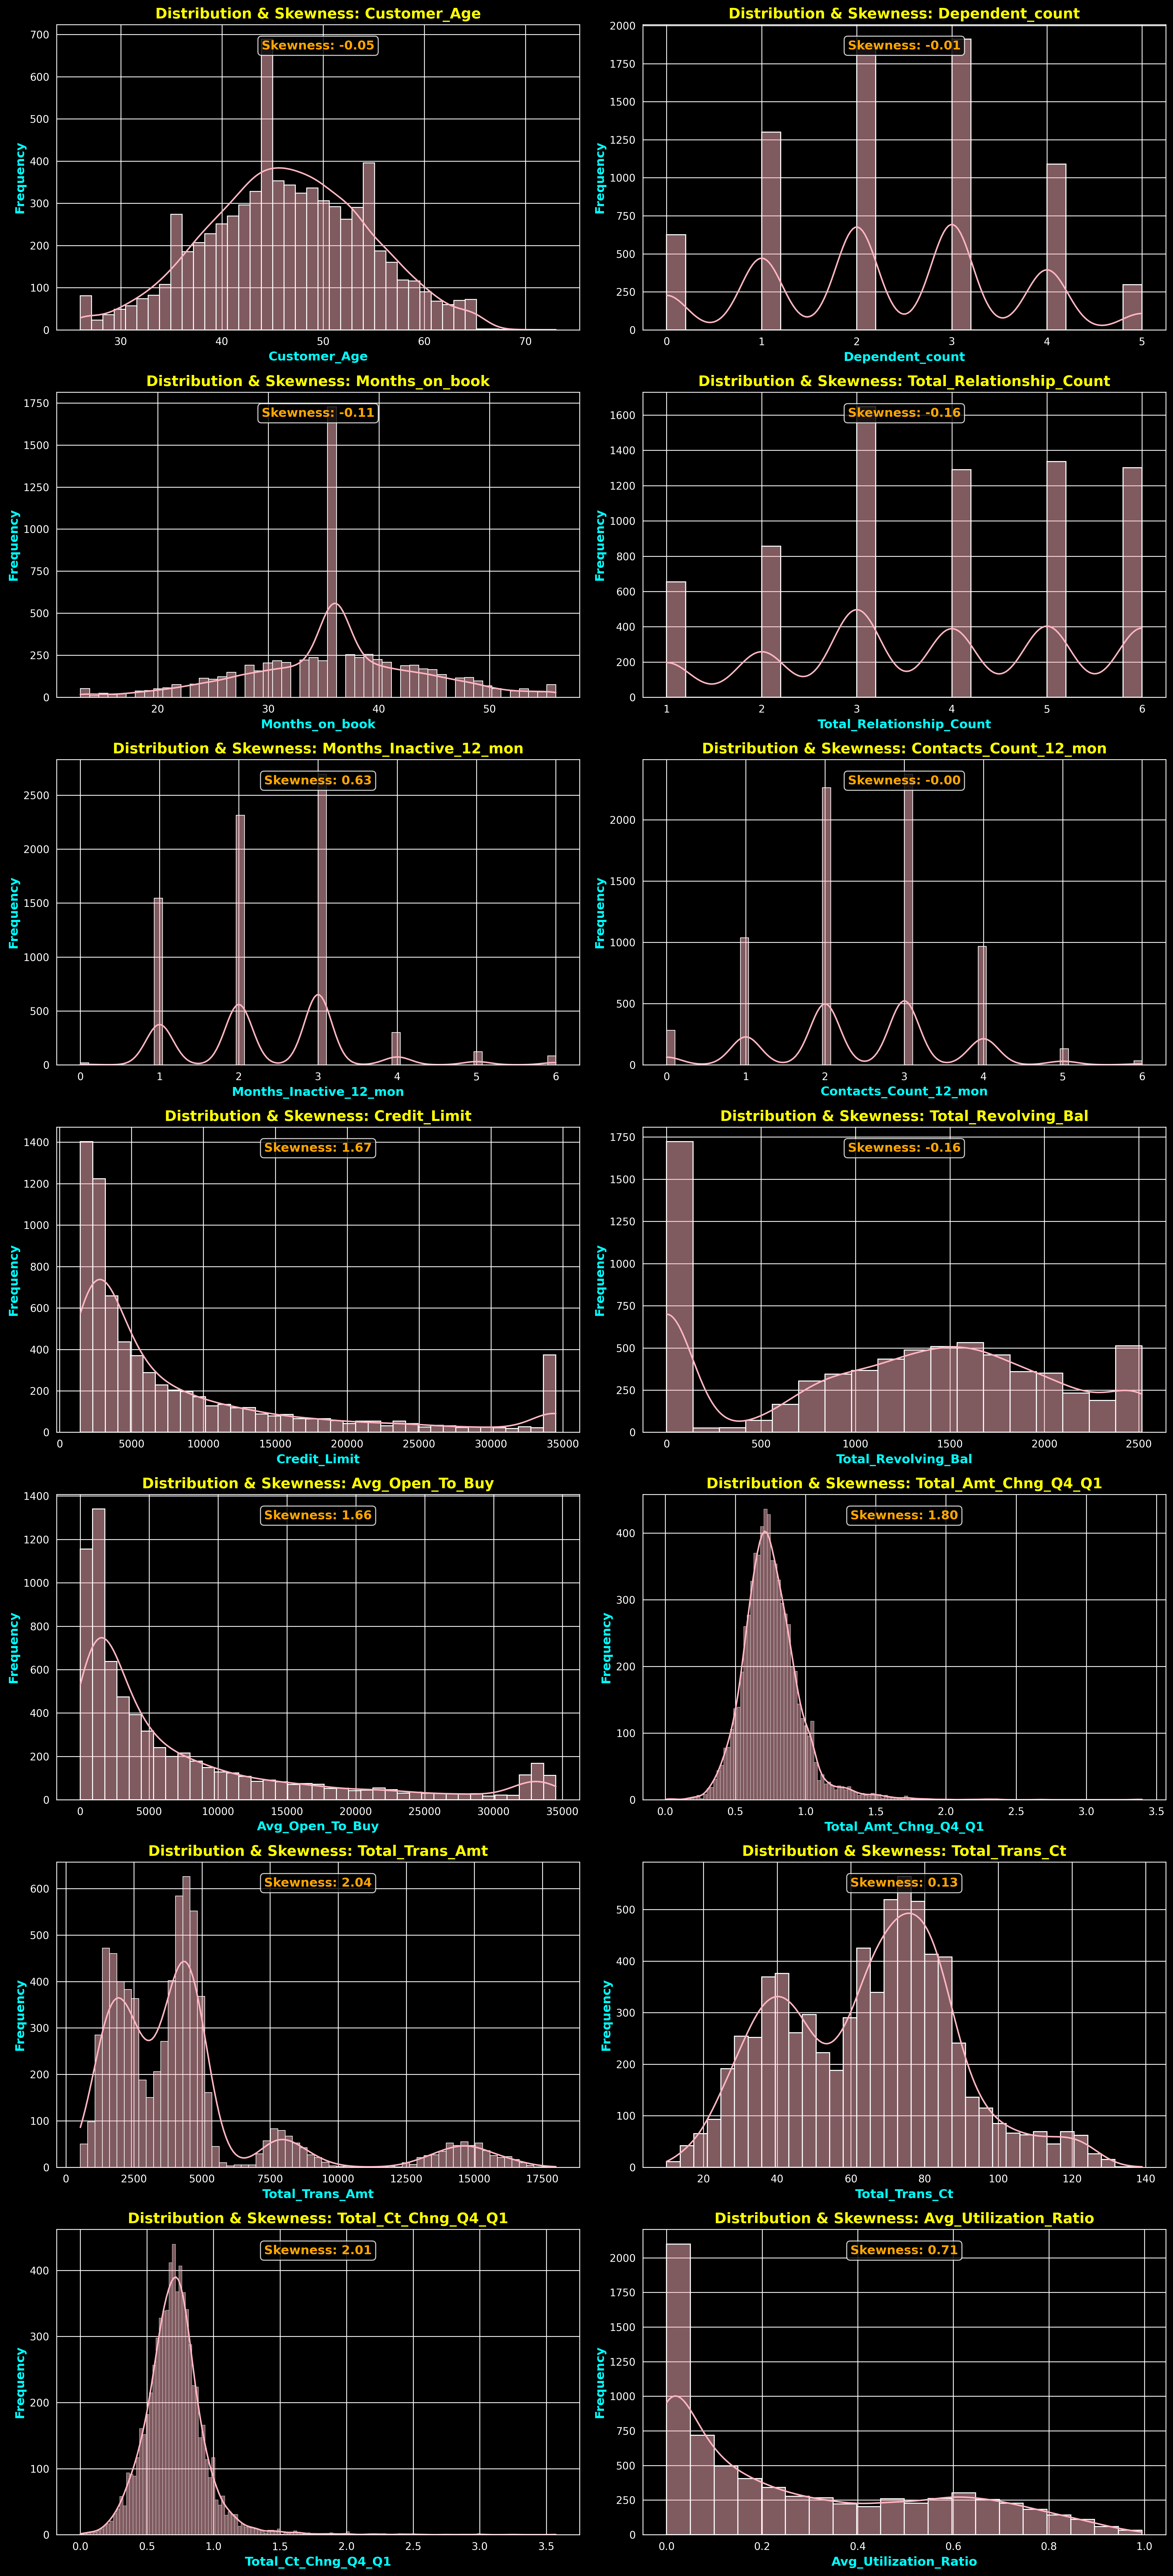

In [ ]:
df = train.copy()
df.columns = df.columns.str.strip()

# Select only numerical features (excluding IDs and target)
numerical_features = df.select_dtypes(include='number').columns.drop(['id', 'CLIENTNUM', 'loan_defaulted'], errors='ignore')

# Limit for performance
df = df.head(10000)

# Set black theme
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Grid layout
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 5 * num_rows), facecolor='black', dpi=300)
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='lightpink')

    # Custom colors
    axes[i].set_title(f'Distribution & Skewness: {col}', fontsize=14, fontweight='bold', color='yellow')
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color='cyan')
    axes[i].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='cyan')
    axes[i].tick_params(colors='white', labelsize=10)  # tick color stays white for readability
    axes[i].set_facecolor('black')

    # Skewness label with custom color
    skewness = skew(df[col].dropna())
    axes[i].text(
        0.5, 0.95,
        f'Skewness: {skewness:.2f}',
        ha='center', va='top',
        transform=axes[i].transAxes,
        fontsize=12, fontweight='bold',
        color='orange',
        bbox=dict(boxstyle="round", facecolor='black', edgecolor='white', alpha=0.8)
    )

    # White borders
    for spine in axes[i].spines.values():
        spine.set_edgecolor('white')

# Remove empty subplot if odd number
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

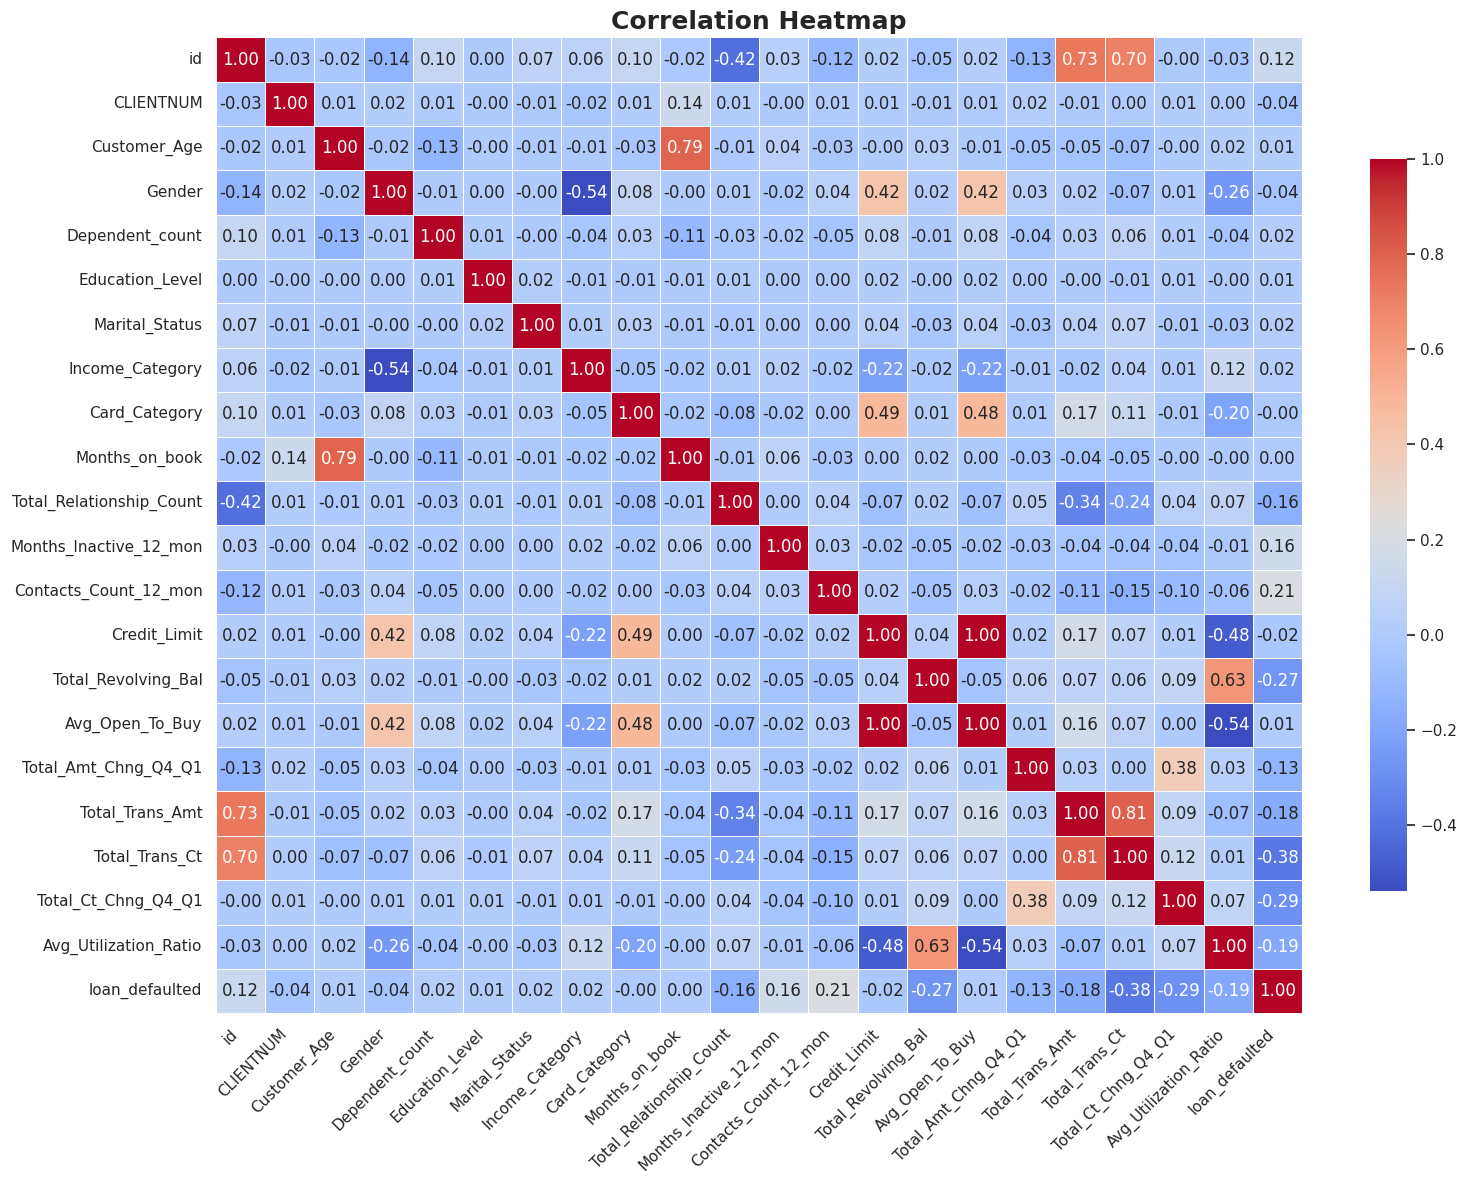

In [ ]:
df = train.copy()
df.columns = df.columns.str.strip()

# Encode categorical columns if needed
encode_cols = ['Gender', 'Card_Category', 'Income_Category', 'Education_Level', 'Marital_Status']
for col in encode_cols:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
        elif col == 'Gender':
            df[col] = df[col].map({'Male': 0, 'Female': 1})

# Compute Pearson correlation matrix
corr_matrix = df.corr(method='pearson')

# Plot full correlation heatmap without masking
plt.figure(figsize=(16, 12))
sns.set(style="white")

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.4,
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Heatmap", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()